# 이미지 변환
- 이미지 cnn 결과 val acc가 오르지 않는 문제 직면.
-  jpg파일, pixel numpy array로 변환하여 저장

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [3]:
import os 
import cv2
from sklearn import utils # sklearn의 shuffle과 같은 기능 사용
from tqdm.notebook import tqdm

In [4]:
from google.colab.patches import cv2_imshow

In [ ]:
fer2013=pd.read_csv('/content/drive/MyDrive/final/data/fer2013.csv')
fer2013.head()
len(fer2013)

35887

In [ ]:
fer2013.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
print(fer2013.pixels[0])
print(type(fer2013.pixels[0]))

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

- 기존 fer2013.csv에서 pixel 항목과 같은 형식의 데이터로 변환
  - (48,48)배열을 하나의 문자열로

In [ ]:
def showImg_label(x,y):
  x_reshaped=x.reshape(48,48)
  plt.imshow(x_reshaped, cmap='gray', interpolation='nearest') #고해상도 보간법
  plt.axis('off')
  plt.show()
  print(y)

In [ ]:
img=fer2013['pixels'][15]
val=img.split(" ")
x_pixels=np.array(val, 'float32')
x_pixels /= 255

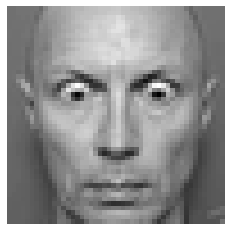

5


In [ ]:
showImg_label(x_pixels, fer2013['emotion'][15])

## sample

In [ ]:
train_dir='/content/drive/MyDrive/final/data/AIHub/train/surprise'

In [ ]:
surprise_names=os.listdir(train_dir)
len(surprise_names)

3197

In [ ]:
sample_path= os.path.join(train_dir,'3100.jpg') 
sample_path

'/content/drive/MyDrive/final/data/AIHub/train/surprise/3100.jpg'

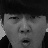

In [ ]:
sample_img=cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
cv2_imshow(sample_img)

In [ ]:
sample_img=cv2.resize(sample_img, (48,48))
sample_pix=list(sample_img.ravel()) 
sample_pix=' '.join(str(s) for s in sample_pix) 
sample_pix

'13 19 12 12 8 12 17 14 18 26 18 17 14 19 12 15 19 19 21 23 20 14 12 14 12 10 13 10 11 14 12 14 14 14 13 12 12 12 12 12 13 15 16 16 17 15 14 16 11 17 11 12 8 11 15 12 15 20 14 14 13 16 11 14 13 15 18 20 20 19 16 14 14 13 14 12 12 13 12 13 14 14 13 12 12 12 12 12 13 15 15 16 17 16 15 16 12 16 11 11 9 10 13 11 12 14 10 10 13 14 11 12 12 15 16 16 18 20 18 13 13 14 13 13 13 13 14 14 14 13 13 12 12 12 13 13 14 15 15 16 18 17 15 17 14 17 13 12 10 10 12 10 9 8 8 8 13 10 10 12 9 11 11 10 14 20 22 19 14 16 12 14 14 13 16 14 15 15 15 15 15 14 15 15 16 17 16 16 18 17 16 18 18 18 15 12 10 9 11 10 7 5 8 7 11 7 9 10 8 8 8 8 10 14 18 19 18 19 14 15 15 13 16 13 16 16 17 18 18 17 17 18 18 18 17 17 18 17 17 18 20 18 16 12 11 8 10 9 7 5 8 7 10 6 9 9 9 9 9 9 8 8 10 12 18 18 15 16 16 16 17 16 16 16 17 18 18 16 16 18 20 20 18 17 18 18 17 20 21 17 17 12 12 9 9 9 7 6 8 8 9 8 9 7 5 6 8 8 8 8 9 12 13 12 13 14 15 17 16 16 15 14 15 17 16 15 15 18 19 20 19 19 19 18 18 21 21 17 18 13 14 9 9 9 6 5 6 7 8 8 8 5 8 9 9 

## Surprise

In [ ]:
rawData = {'emotion':[] ,
            'pixels': [] }

data = pd.DataFrame(rawData)
data

,emotion,pixels


In [ ]:
for name in surprise_names:
  img_path = os.path.join(train_dir,name) 
  img_data = cv2.resize(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE), (48,48))
  img_pix=list(img_data.ravel())
  img_pix=' '.join(str(s) for s in img_pix)
  data_to_insert = {'emotion': 5, 'pixels' : img_pix}
  data=data.append(data_to_insert, ignore_index=True)

In [ ]:
data

,emotion,pixels
0,5.0,10 8 7 9 10 21 25 37 39 34 45 82 82 82 88 93 9...
1,5.0,69 78 83 92 97 107 124 119 58 32 62 79 106 157...
2,5.0,219 217 218 218 224 151 59 75 51 50 107 163 14...
3,5.0,254 253 255 254 255 255 250 101 33 54 73 74 64...
4,5.0,99 98 82 78 69 56 53 55 51 52 58 67 83 110 118...
...,...,...
3192,5.0,195 196 177 179 110 37 51 58 68 83 87 83 81 80...
3193,5.0,250 251 249 250 254 249 251 247 255 164 0 28 1...
3194,5.0,145 158 164 129 74 47 54 64 54 72 91 104 114 1...
3195,5.0,9 38 69 99 86 102 111 105 65 58 64 49 41 39 35...


## Happy, Sad, Neutral

In [ ]:
base_dir='/content/drive/MyDrive/final/data/AIHub/train'
happy_path=os.path.join(base_dir, 'happiness')
sad_path=os.path.join(base_dir, 'sadness')
neutral_path=os.path.join(base_dir, 'neutral')

In [ ]:
happy_names=os.listdir(happy_path)
sad_names=os.listdir(sad_path)
neutral_names=os.listdir(neutral_path)

In [ ]:
emotion_label = {'happiness':3 ,  'sadness' :4 , 'neutral' :6}

In [ ]:
emotion_label['happiness']

3

In [ ]:
def fill_data(emotion_path, emotion_names,label):
  global data
  for name in emotion_names:
      img_path = os.path.join(emotion_path,name) 
      img_data = cv2.resize(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE), (48,48))
      img_pix=list(img_data.ravel())
      img_pix=' '.join(str(s) for s in img_pix)
      data_to_insert = {'emotion': label, 'pixels' : img_pix}
      data=data.append(data_to_insert, ignore_index=True)

In [ ]:
fill_data(happy_path, happy_names, 3)

In [ ]:
data

,emotion,pixels
0,5.0,10 8 7 9 10 21 25 37 39 34 45 82 82 82 88 93 9...
1,5.0,69 78 83 92 97 107 124 119 58 32 62 79 106 157...
2,5.0,219 217 218 218 224 151 59 75 51 50 107 163 14...
3,5.0,254 253 255 254 255 255 250 101 33 54 73 74 64...
4,5.0,99 98 82 78 69 56 53 55 51 52 58 67 83 110 118...
...,...,...
10487,3.0,45 61 57 39 63 94 124 141 141 157 161 170 178 ...
10488,3.0,133 157 184 208 212 207 206 210 206 197 176 15...
10489,3.0,139 130 138 132 128 112 90 88 79 103 119 137 1...
10490,3.0,197 196 200 194 199 149 119 119 105 95 108 109...


In [ ]:
fill_data(sad_path, sad_names, 4)
fill_data(neutral_path, neutral_names, 6)

In [ ]:
data

,emotion,pixels
0,5.0,10 8 7 9 10 21 25 37 39 34 45 82 82 82 88 93 9...
1,5.0,69 78 83 92 97 107 124 119 58 32 62 79 106 157...
2,5.0,219 217 218 218 224 151 59 75 51 50 107 163 14...
3,5.0,254 253 255 254 255 255 250 101 33 54 73 74 64...
4,5.0,99 98 82 78 69 56 53 55 51 52 58 67 83 110 118...
...,...,...
20292,6.0,47 53 84 119 93 62 51 56 52 56 56 56 57 57 57 ...
20293,6.0,30 23 25 21 28 36 50 77 97 104 110 113 119 127...
20294,6.0,42 31 6 6 0 3 3 0 0 0 10 71 133 169 187 198 20...
20295,6.0,220 221 195 129 122 128 131 123 126 135 140 14...


In [ ]:
data.to_csv('/content/drive/MyDrive/final/data/emotion.csv', index=False)

In [5]:
df=pd.read_csv('/content/drive/MyDrive/final/data/emotion_data2.csv')
df

,emotion,pixels
0,5.0,10 8 7 9 10 21 25 37 39 34 45 82 82 82 88 93 9...
1,5.0,69 78 83 92 97 107 124 119 58 32 62 79 106 157...
2,5.0,219 217 218 218 224 151 59 75 51 50 107 163 14...
3,5.0,254 253 255 254 255 255 250 101 33 54 73 74 64...
4,5.0,99 98 82 78 69 56 53 55 51 52 58 67 83 110 118...
...,...,...
20292,6.0,47 53 84 119 93 62 51 56 52 56 56 56 57 57 57 ...
20293,6.0,30 23 25 21 28 36 50 77 97 104 110 113 119 127...
20294,6.0,42 31 6 6 0 3 3 0 0 0 10 71 133 169 187 198 20...
20295,6.0,220 221 195 129 122 128 131 123 126 135 140 14...


In [ ]:
df.emotion.value_counts()

3.0    7295
6.0    4966
4.0    4839
5.0    3197
Name: emotion, dtype: int64

# DCNN

In [6]:
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [ ]:
le = LabelEncoder()
img_labels = le.fit_transform(df['emotion'])
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(20297, 4)

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3.0: 0, 4.0: 1, 5.0: 2, 6.0: 3}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16237, 48, 48, 1), (4060, 48, 48, 1), (16237, 4), (4060, 4))

In [ ]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

- 네트워크 구성

In [ ]:
def build_net5(optim):
            net = Sequential(name='DCNN')

            net.add(Conv2D(filters=128, kernel_size=(5,5),input_shape=(img_width, img_height, img_depth),activation='elu',
                           padding='same',kernel_initializer='he_normal', name='conv2d_1'))
            net.add(BatchNormalization(name='batchnorm_1'))
            net.add(Conv2D(filters=128, kernel_size=(5,5),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_2'))
            net.add(BatchNormalization(name='batchnorm_2'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
            net.add(Dropout(0.3, name='dropout_1'))

            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_3'))
            net.add(BatchNormalization(name='batchnorm_3'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_4'))
            net.add(BatchNormalization(name='batchnorm_4'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_7'))
            net.add(BatchNormalization(name='batchnorm_7'))           
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
            net.add(Dropout(0.4, name='dropout_2'))

            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_5'))
            net.add(BatchNormalization(name='batchnorm_5'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_6'))
            net.add(BatchNormalization(name='batchnorm_6'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_8'))
            net.add(BatchNormalization(name='batchnorm_8'))            
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
            net.add(Dropout(0.4, name='dropout_3'))

            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_9'))
            net.add(BatchNormalization(name='batchnorm_10'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_10'))
            net.add(BatchNormalization(name='batchnorm_11'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_11'))
            net.add(BatchNormalization(name='batchnorm_12'))            
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_4'))
            net.add(Dropout(0.5, name='dropout_4'))            


            net.add(Flatten(name='flatten'))
            net.add(Dense(128,activation='elu',kernel_initializer='he_normal',name='dense_1'))
            net.add(BatchNormalization(name='batchnorm_9'))
            net.add(Dropout(0.6, name='dropout_5'))
            net.add(Dense(num_classes,activation='softmax',name='out_layer'))

            net.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

            net.summary()

            
            return net

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=10,verbose=1,
    restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=7,min_lr=1e-7,verbose=1)

callbacks = [early_stopping,lr_scheduler]

- 증식

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.15,height_shift_range=0.15,
    shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
train_datagen.fit(X_train)

In [ ]:
batch_size = 64 
epochs = 100
optims = [optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam')
          ,optimizers.Adam(0.001)]

model5 = build_net5(optims[1]) 
history = model5.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) / batch_size,epochs=epochs,callbacks=callbacks)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       3328      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 128)      512       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       409728    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 128)      512       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 128)       0      

In [ ]:
result= model5.evaluate(X_test, y_test)

127/127 [==============================] - 2s 14ms/step - loss: 0.2332 - accuracy: 0.8209


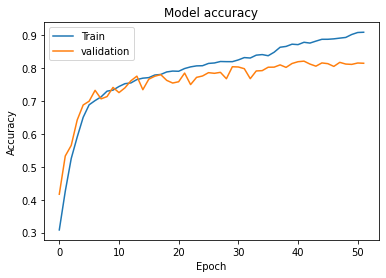

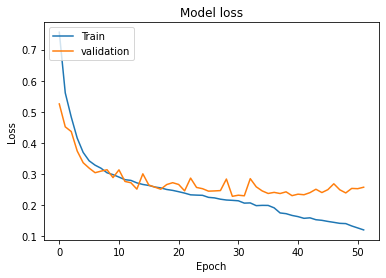

In [ ]:
import matplotlib.pyplot as plot

plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'validation'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'validation'], loc='upper left')
plot.show()

In [ ]:
model5.save("DCNN_modi1.h5")

# Dataset, Train/Validation/Test로 다시 분류
- 전체 데이터의 20%를 Test 자료로 사용
- 나머지 자료의 80%를 Train, 20%를 Validation 자료로 사용

In [ ]:
df

,emotion,pixels
0,5.0,10 8 7 9 10 21 25 37 39 34 45 82 82 82 88 93 9...
1,5.0,69 78 83 92 97 107 124 119 58 32 62 79 106 157...
2,5.0,219 217 218 218 224 151 59 75 51 50 107 163 14...
3,5.0,254 253 255 254 255 255 250 101 33 54 73 74 64...
4,5.0,99 98 82 78 69 56 53 55 51 52 58 67 83 110 118...
...,...,...
20292,6.0,47 53 84 119 93 62 51 56 52 56 56 56 57 57 57 ...
20293,6.0,30 23 25 21 28 36 50 77 97 104 110 113 119 127...
20294,6.0,42 31 6 6 0 3 3 0 0 0 10 71 133 169 187 198 20...
20295,6.0,220 221 195 129 122 128 131 123 126 135 140 14...


- X : pixels
- Y : emotion

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16237, 48, 48, 1), (4060, 48, 48, 1), (16237, 4), (4060, 4))

In [ ]:
X, X_test, Y, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.2, random_state=42)
X.shape, X_test.shape, Y.shape, y_test.shape

((16237, 48, 48, 1), (4060, 48, 48, 1), (16237, 4), (4060, 4))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, shuffle=True, 
                                                    test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((12989, 48, 48, 1), (3248, 48, 48, 1), (12989, 4), (3248, 4))

- train : 12989
- validation : 3248
- test: 4060

In [ ]:
img_width = x_train.shape[1]
img_height = x_train.shape[2]
img_depth = x_train.shape[3]
num_classes = y_train.shape[1]

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.

In [ ]:
X_test=X_test/255.

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.15,height_shift_range=0.15,
    shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
train_datagen.fit(x_train)

In [ ]:
def build_net5(optim):
            net = Sequential(name='DCNN')

            net.add(Conv2D(filters=128, kernel_size=(5,5),input_shape=(img_width, img_height, img_depth),activation='elu',
                           padding='same',kernel_initializer='he_normal', name='conv2d_1'))
            net.add(BatchNormalization(name='batchnorm_1'))
            net.add(Conv2D(filters=128, kernel_size=(5,5),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_2'))
            net.add(BatchNormalization(name='batchnorm_2'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
            net.add(Dropout(0.3, name='dropout_1'))

            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_3'))
            net.add(BatchNormalization(name='batchnorm_3'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_4'))
            net.add(BatchNormalization(name='batchnorm_4'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_7'))
            net.add(BatchNormalization(name='batchnorm_7'))           
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
            net.add(Dropout(0.4, name='dropout_2'))

            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_5'))
            net.add(BatchNormalization(name='batchnorm_5'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_6'))
            net.add(BatchNormalization(name='batchnorm_6'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_8'))
            net.add(BatchNormalization(name='batchnorm_8'))            
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
            net.add(Dropout(0.4, name='dropout_3'))

            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_9'))
            net.add(BatchNormalization(name='batchnorm_10'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_10'))
            net.add(BatchNormalization(name='batchnorm_11'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_11'))
            net.add(BatchNormalization(name='batchnorm_12'))            
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_4'))
            net.add(Dropout(0.5, name='dropout_4'))            


            net.add(Flatten(name='flatten'))
            net.add(Dense(128,activation='elu',kernel_initializer='he_normal',name='dense_1'))
            net.add(BatchNormalization(name='batchnorm_9'))
            net.add(Dropout(0.6, name='dropout_5'))
            net.add(Dense(num_classes,activation='softmax',name='out_layer'))

            net.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

            net.summary()

            
            return net

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=10,verbose=1,
    restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=7,min_lr=1e-7,verbose=1)

callbacks = [early_stopping,lr_scheduler]

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.15,height_shift_range=0.15,
    shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
train_datagen.fit(x_train)

In [ ]:
batch_size = 64 
epochs = 100
optims = [optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam')
          ,optimizers.Adam(0.001)]

In [ ]:
model = build_net5(optims[1]) 
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) / batch_size,epochs=epochs,callbacks=callbacks)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       3328      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 128)      512       
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       409728    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 128)      512       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 128)       0      

In [ ]:
result= model.evaluate(x_val, y_val)

102/102 [==============================] - 1s 12ms/step - loss: 0.6378 - accuracy: 0.8236


In [ ]:
result= model.evaluate(X_test, y_test)

127/127 [==============================] - 2s 12ms/step - loss: 0.6327 - accuracy: 0.8143


In [ ]:
model.save("/content/drive/MyDrive/final/data/DCNNmodel.h5")

In [ ]:
def build_net(optim):
            net = Sequential(name='DCNN')

            net.add(Conv2D(filters=256,kernel_size=(5,5),input_shape=(img_width, img_height, img_depth),activation='elu',
                           padding='same',kernel_initializer='he_normal', name='conv2d_1'))
            net.add(BatchNormalization(name='batchnorm_1'))
            net.add(Conv2D(filters=128,kernel_size=(5,5),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_2'))
            net.add(BatchNormalization(name='batchnorm_2'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
            net.add(Dropout(0.4, name='dropout_1'))
            net.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_3'))
            net.add(BatchNormalization(name='batchnorm_3'))
            net.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_4'))
            net.add(BatchNormalization(name='batchnorm_4'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
            net.add(Dropout(0.4, name='dropout_2'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_5'))
            net.add(BatchNormalization(name='batchnorm_5'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_6'))
            net.add(BatchNormalization(name='batchnorm_6'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
            net.add(Dropout(0.5, name='dropout_3'))
            net.add(Flatten(name='flatten'))
            net.add(Dense(128,activation='elu',kernel_initializer='he_normal',name='dense_1'))
            net.add(BatchNormalization(name='batchnorm_7'))
            net.add(Dropout(0.6, name='dropout_4'))
            net.add(Dense(num_classes,activation='softmax',name='out_layer'))

            net.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

            net.summary()

            
            return net

In [ ]:
model = build_net(optims[1]) 
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) / batch_size,epochs=epochs,callbacks=callbacks)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 256)       6656      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 256)      1024      
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       819328    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 128)      512       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 128)       0      

In [ ]:
result= model.evaluate(x_val, y_val)

102/102 [==============================] - 1s 12ms/step - loss: 0.5054 - accuracy: 0.8100


In [ ]:
result= model.evaluate(X_test, y_test)

127/127 [==============================] - 2s 13ms/step - loss: 0.5114 - accuracy: 0.8052


# 예측하기(Test)

In [ ]:
df

,emotion,pixels
0,5.0,10 8 7 9 10 21 25 37 39 34 45 82 82 82 88 93 9...
1,5.0,69 78 83 92 97 107 124 119 58 32 62 79 106 157...
2,5.0,219 217 218 218 224 151 59 75 51 50 107 163 14...
3,5.0,254 253 255 254 255 255 250 101 33 54 73 74 64...
4,5.0,99 98 82 78 69 56 53 55 51 52 58 67 83 110 118...
...,...,...
20292,6.0,47 53 84 119 93 62 51 56 52 56 56 56 57 57 57 ...
20293,6.0,30 23 25 21 28 36 50 77 97 104 110 113 119 127...
20294,6.0,42 31 6 6 0 3 3 0 0 0 10 71 133 169 187 198 20...
20295,6.0,220 221 195 129 122 128 131 123 126 135 140 14...


In [7]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48,48,1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [8]:
le = LabelEncoder()
img_labels = le.fit_transform(df['emotion'])
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(20297, 4)

In [9]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3.0: 0, 4.0: 1, 5.0: 2, 6.0: 3}


In [10]:
X_train, X_test, y_train, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16237, 48, 48, 1), (4060, 48, 48, 1), (16237, 4), (4060, 4))

In [11]:
X, X_test, Y, y_test = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.2, random_state=42)
X.shape, X_test.shape, Y.shape, y_test.shape

((16237, 48, 48, 1), (4060, 48, 48, 1), (16237, 4), (4060, 4))

In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, shuffle=True, 
                                                    test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((12989, 48, 48, 1), (3248, 48, 48, 1), (12989, 4), (3248, 4))

In [13]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
num_classes = y_train.shape[1]
img_depth = X_train.shape[3]

In [14]:
x_train = x_train / 255.
x_val = x_val / 255.
X_test=X_test/255.

In [15]:
def build_net(optim):
            net = Sequential(name='DCNN')

            net.add(Conv2D(filters=256,kernel_size=(5,5),input_shape=(img_width, img_height,img_depth),activation='elu',
                           padding='same',kernel_initializer='he_normal', name='conv2d_1'))
            net.add(BatchNormalization(name='batchnorm_1'))
            net.add(Conv2D(filters=128,kernel_size=(5,5),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_2'))
            net.add(BatchNormalization(name='batchnorm_2'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
            net.add(Dropout(0.4, name='dropout_1'))
            net.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_3'))
            net.add(BatchNormalization(name='batchnorm_3'))
            net.add(Conv2D(filters=128,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_4'))
            net.add(BatchNormalization(name='batchnorm_4'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
            net.add(Dropout(0.4, name='dropout_2'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_5'))
            net.add(BatchNormalization(name='batchnorm_5'))
            net.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',padding='same',kernel_initializer='he_normal',
                        name='conv2d_6'))
            net.add(BatchNormalization(name='batchnorm_6'))
            net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
            net.add(Dropout(0.5, name='dropout_3'))
            net.add(Flatten(name='flatten'))
            net.add(Dense(128,activation='elu',kernel_initializer='he_normal',name='dense_1'))
            net.add(BatchNormalization(name='batchnorm_7'))
            net.add(Dropout(0.6, name='dropout_4'))
            net.add(Dense(num_classes,activation='softmax',name='out_layer'))

            net.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

            net.summary()

            
            return net

In [16]:
train_datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.15,height_shift_range=0.15,
    shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
train_datagen.fit(x_train)

In [17]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.00005,patience=10,verbose=1,
    restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=7,min_lr=1e-7,verbose=1)

callbacks = [early_stopping,lr_scheduler]

In [18]:
batch_size = 64 
epochs = 100
optims = [optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam')
          ,optimizers.Adam(0.001)]

In [28]:
model = build_net(optims[1]) 
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) / batch_size,epochs=epochs,callbacks=callbacks)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 256)       6656      
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 48, 48, 256)      1024      
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       819328    
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 48, 48, 128)      512       
 tion)                                                           
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 128)       0      

In [29]:
result= model.evaluate(X_test, y_test)

127/127 [==============================] - 1s 11ms/step - loss: 0.5386 - accuracy: 0.8074


In [30]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(X_test)

In [47]:
predictions[999]

array([0.17881972, 0.19244619, 0.44895148, 0.17978257], dtype=float32)

In [49]:
 np.argmax(predictions[999])

2

## 이미지 테스트

In [20]:
from PIL import Image
import imageio
from matplotlib import cm

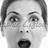

In [25]:
sample = np.reshape(X_test[600]*255, (48,48))
imageio.imwrite('/content/drive/MyDrive/data/AIHUB/004.jpg',sample)
sample=cv2.imread('/content/drive/MyDrive/data/AIHUB/004.jpg')
cv2_imshow(sample)

In [44]:
for i in range(50):
  if y_test.tolist()[i]==[0.,0.,0.,1.]:
    print(i)

3
4
11
15
20
23
24
29
34
39
47


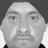

In [105]:
img=np.reshape(X_test[3]*255, (48,48))
imageio.imwrite(f'/content/drive/MyDrive/data/AIHUB/test3.jpg',img)
test3=cv2.imread('/content/drive/MyDrive/data/AIHUB/test3.jpg')
cv2_imshow(test3)

In [45]:
for i in range(50):
  if y_test.tolist()[i]==[0.,0.,1.,0.]:
    print(i)

13
17
31
36
37
42
43
45
46


In [46]:
for i in range(50):
  if y_test.tolist()[i]==[0.,1.,0.,0.]:
    print(i)

0
1
2
5
6
12
14
18
22
27
33
38


In [47]:
for i in range(50):
  if y_test.tolist()[i]==[1.,0.,0.,0.]:
    print(i)

7
8
9
10
16
19
21
25
26
28
30
32
35
40
41
44
48
49


In [26]:
def testImg_save(n,num):
  img=np.reshape(X_test[n]*255, (48,48))
  imageio.imwrite(f'/content/drive/MyDrive/data/AIHUB/test{num}.jpg',img)


## 샘플이미지 추출

In [ ]:
testImg_save(7,'7')
testImg_save(8,'8')
testImg_save(12,'12')
testImg_save(14,'14')
testImg_save(31,'31')
testImg_save(36,'36')
testImg_save(20,'20')
testImg_save(23,'23')

In [ ]:
testImg_save(28,'28')
testImg_save(44,'44')
testImg_save(27,'27')
testImg_save(33,'33')
testImg_save(45,'45')
testImg_save(46,'46')
testImg_save(47,'47')
testImg_save(39,'39')

In [70]:
test_img7=cv2.imread('/content/drive/MyDrive/data/AIHUB/test07.jpg')
test_img8=cv2.imread('/content/drive/MyDrive/data/AIHUB/test08.jpg')
test_img28=cv2.imread('/content/drive/MyDrive/data/AIHUB/test28.jpg')
test_img44=cv2.imread('/content/drive/MyDrive/data/AIHUB/test44.jpg')
test_img12=cv2.imread('/content/drive/MyDrive/data/AIHUB/test12.jpg')
test_img14=cv2.imread('/content/drive/MyDrive/data/AIHUB/test14.jpg')
test_img27=cv2.imread('/content/drive/MyDrive/data/AIHUB/test27.jpg')
test_img33=cv2.imread('/content/drive/MyDrive/data/AIHUB/test33.jpg')
test_img31=cv2.imread('/content/drive/MyDrive/data/AIHUB/test31.jpg')
test_img36=cv2.imread('/content/drive/MyDrive/data/AIHUB/test36.jpg')
test_img45=cv2.imread('/content/drive/MyDrive/data/AIHUB/test45.jpg')
test_img46=cv2.imread('/content/drive/MyDrive/data/AIHUB/test46.jpg')
test_img20=cv2.imread('/content/drive/MyDrive/data/AIHUB/test20.jpg')
test_img23=cv2.imread('/content/drive/MyDrive/data/AIHUB/test23.jpg')
test_img39=cv2.imread('/content/drive/MyDrive/data/AIHUB/test39.jpg')
test_img47=cv2.imread('/content/drive/MyDrive/data/AIHUB/test47.jpg')

In [63]:
emotion_label = {0 :'happiness' , 1: 'sadness' , 2: 'surprise', 3: 'neutral' }

In [82]:
predictions[20][2]

0.1890925

In [53]:
y_test[20].tolist().index(1.0)

3

In [94]:
def plot_image(i):
  global predictions, emotion_label
  true_label = y_test[i].tolist().index(1.0)
  img=cv2.imread(f'/content/drive/MyDrive/data/AIHUB/test{i}.jpg')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions[i])
  if predicted_label == true_label:
    plt.xlabel("{} {:2.0f}%".format(emotion_label[true_label] ,100*max(predictions[i])),color='b')
  else:
    plt.xlabel("{} {:2.0f}% \n real emotion : {} {:2.0f}%".format(emotion_label[predicted_label] ,100*max(predictions[i]), emotion_label[true_label],100*(predictions[i][true_label]) ),color='r')


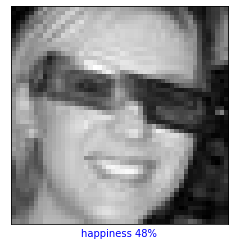

In [95]:
plot_image(7)

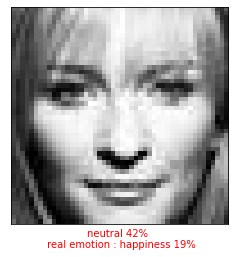

In [96]:
plot_image(8)

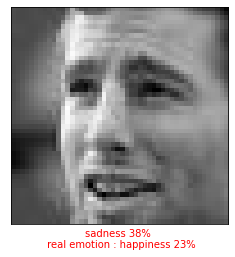

In [97]:
plot_image(28)

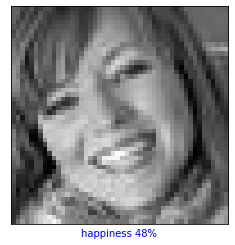

In [98]:
plot_image(44)

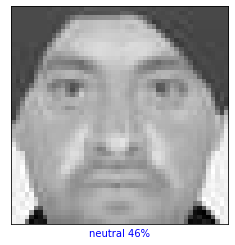

In [107]:
plot_image(3)

In [87]:
def plot_value_array(i):
  true_label = y_test[i].tolist().index(1.0)
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions[i], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions[i])

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

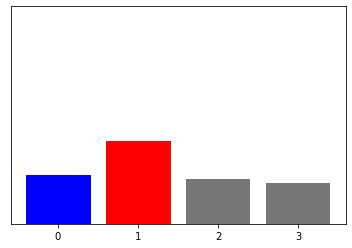

In [89]:
plot_value_array(28)

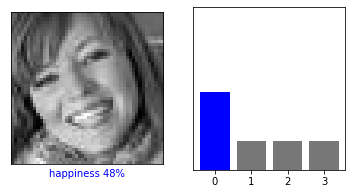

In [90]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(44, test_img44)
plt.subplot(1,2,2)
plot_value_array(44)
plt.show()

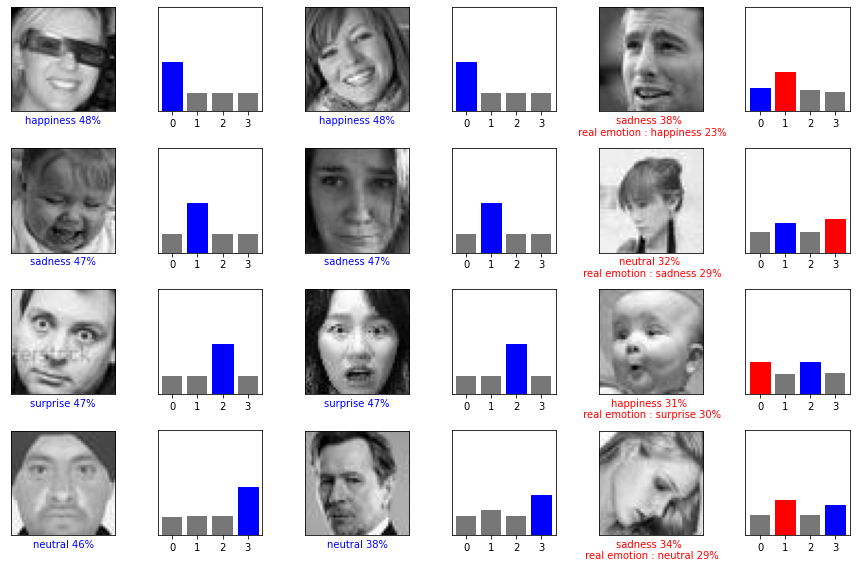

In [111]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#testlist=[7, 8, 28, 44,12,14,27,33,31,36,45,46,20,23,39,47 ]
testlist=[7,44,28,12,14,27,36,45,46,3,23,20]
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(testlist[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(testlist[i])
plt.tight_layout()
plt.show()